<a href="https://colab.research.google.com/github/lijoraju/QuoraQuestionPairSimilarity/blob/main/Quora_Question_Pair_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quora Question Pairs

## 1. Business Problem


**Problem Statement:**  

Quora, a popular Q&A platform, hosts millions of questions from users worldwide. Due to the high volume of queries, many questions with the same intent but different wording appear on the platform. This redundancy makes it challenging for users to find the best answers efficiently and creates additional workload for contributors who may need to respond to multiple variations of the same question.  

To address this issue, Quora currently employs a Random Forest model to identify duplicate questions. However, there is an opportunity to improve the accuracy and efficiency of this classification task using advanced natural language processing (NLP) techniques.  

The task is to develop models that can effectively determine whether a pair of questions are duplicates. And the overall goal is to enhance Quora's ability to group similar questions, ensuring users can access high-quality answers more easily while improving the overall user experience on the platform.

> Credits: https://www.kaggle.com/competitions/quora-question-pairs/overview

## 2. Machine Learning Problem

**Type of ML Problem**

It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not.


**Datasets**
>Source: https://www.kaggle.com/competitions/quora-question-pairs/data

**Data fields**

- id - the id of a training set question pair
- qid1, qid2 - unique ids of each question (only available in train.csv)
- question1, question2 - the full text of each question
- is_duplicate - the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise

**Performance Metrics**



1.   Log Loss
2.   Binary Confusion Matrix




## 3. Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 3.1 Basic Statistics

In [2]:
df = pd.read_csv('train.csv')

In [5]:
df.shape

(404290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


#### 3.1.1 Distribution of data points among the output classes [Duplicate, Not Duplicate]

<Axes: xlabel='is_duplicate'>

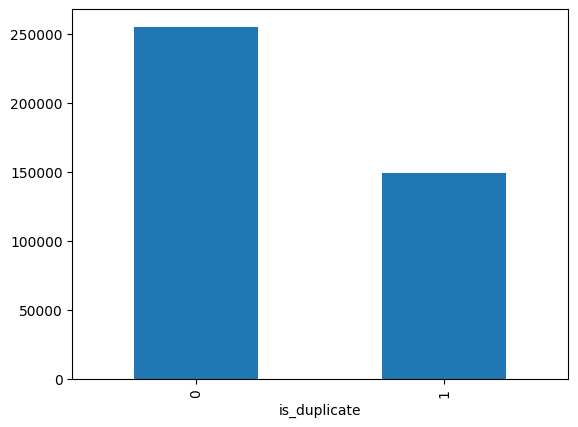

In [11]:
df.groupby('is_duplicate')['id'].count().plot.bar()

In [16]:
print("Percent of Duplicate Question Pairs: {}%".format(round(df['is_duplicate'].mean(), 2) * 100))
print("Percent of Not Duplicate Question Pairs: {}%".format(100 - round(df['is_duplicate'].mean(), 2) * 100))

Percent of Duplicate Question Pairs: 37.0%
Percent of Not Duplicate Question Pairs: 63.0%


#### 3.1.2 Number of Unique Questions

In [21]:
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unique_qs = len(np.unique(qids))
repeated_qs = np.sum(qids.value_counts() > 1)

print("Number of unique questions {}".format(unique_qs))
print("Number of repeated questions {}".format(repeated_qs))

Number of unique questions 537933
Number of repeated questions 111780


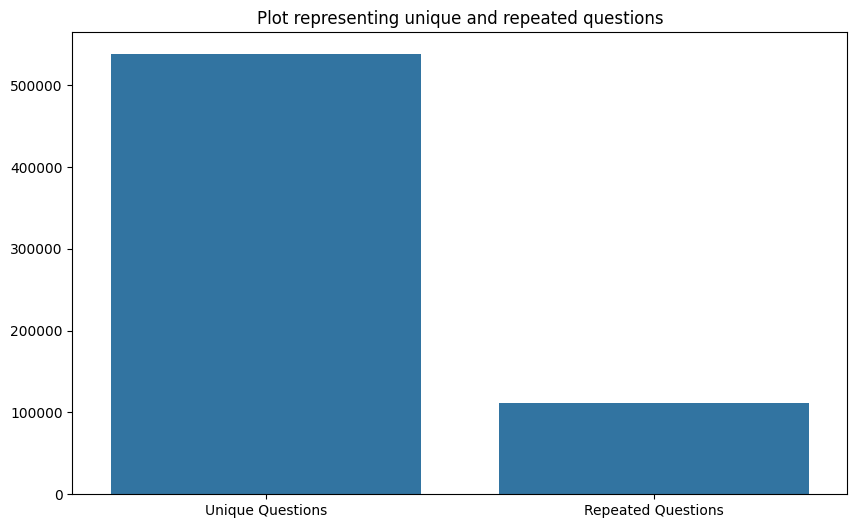

In [35]:
x = ["Unique Questions", "Repeated Questions"]
y= [unique_qs, repeated_qs]


plt.figure(figsize=(10, 6))
plt.title("Plot representing unique and repeated questions")
sns.barplot(x=x, y=y)
plt.show()

#### 3.1.3 Checking for Duplicates

In [45]:
question_pairs_count = df[['qid1', 'qid2', 'is_duplicate']].groupby(['qid1', 'qid2']).count().reset_index()



In [46]:
print("Number of duplicate pairs {}".format(df.shape[0] - question_pairs_count.shape[0]))

Number of duplicate pairs 0


#### 3.1.4 Number of occurence of each question

In [48]:
print("Max number of occurence for a question {}".format(max(qids.value_counts())))

Max number of occurence for a question 157


Text(0, 0.5, 'Number of questions')

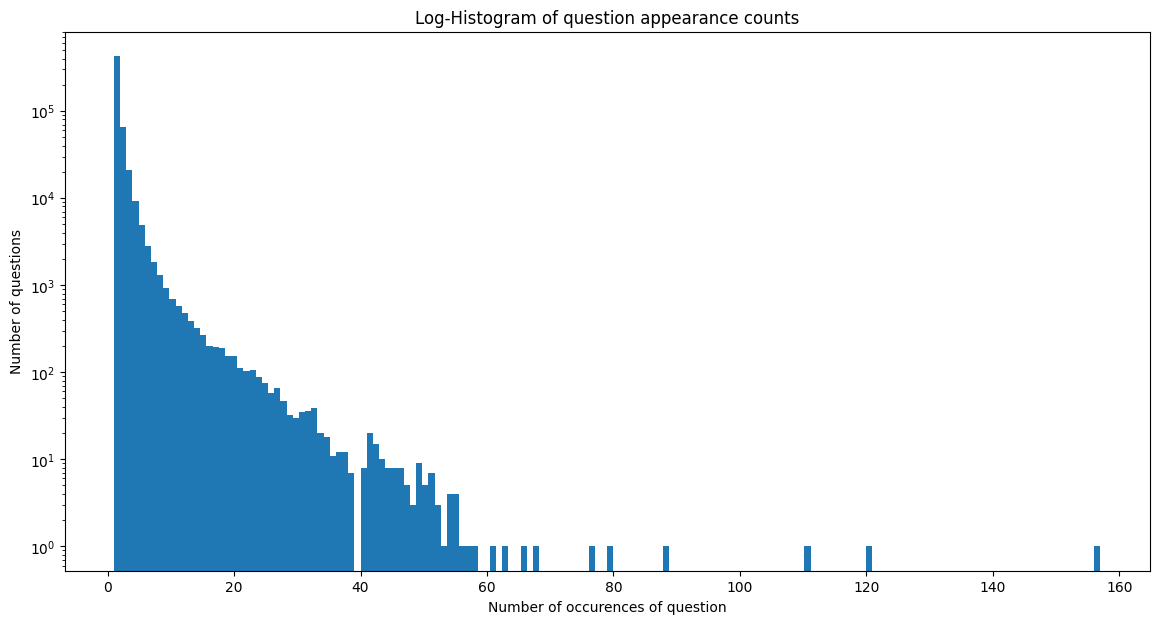

In [53]:
plt.figure(figsize=(14, 7))
plt.hist(qids.value_counts(), bins=160)
plt.yscale('log')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of question')
plt.ylabel('Number of questions')

#### 3.1.5 Checking for Null Values

In [70]:
df.isnull().any().sum()

0

In [71]:
df.fillna('', inplace=True)  # Replace Null values by empty string